#### `t_SNE` converts Euclidean distance between pairs of points into probabilities.
##### Around each point, there's a Gaussian centered at that point, and the probability distribution represents the chance of any other point being a neighbor.
##### Points very far away from each other have a low chance of being neighbors

In [4]:
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE, MDS, Isomap 

import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
from sklearn.datasets import load_iris 
iris = load_iris()
iris_X = iris.data 
y = iris.target 

In [6]:
iris_pca = PCA(n_components=2).fit_transform(iris_X)
iris_tsne = TSNE(learning_rate=200).fit_transform(iris_X)

iris_MDS = MDS(n_components=2).fit_transform(iris_X)
iris_ISO = Isomap(n_components=2).fit_transform(iris_X)


c:\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\manifold\_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Python39\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Text(0.5, 1.0, 'ISO')

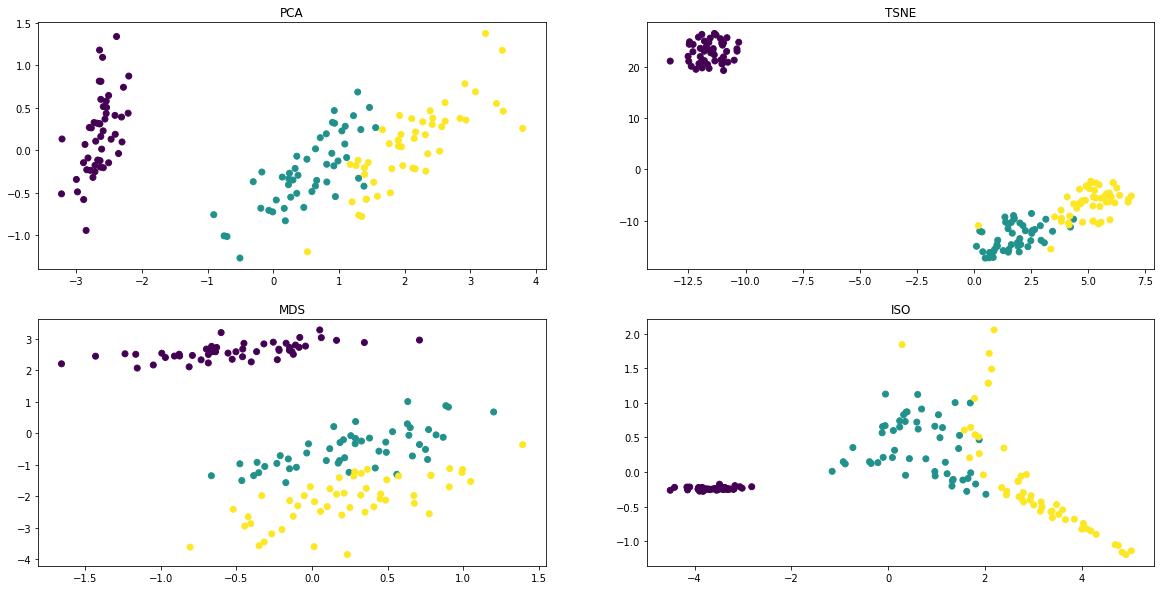

In [7]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.title('PCA')
plt.scatter(iris_pca[:,0], iris_pca[:,1], c = y)

plt.subplot(222)
plt.scatter(iris_tsne[:,0],iris_tsne[:,1],c=y)
plt.title('TSNE')

plt.subplot(223)
plt.scatter(iris_MDS[:,0],iris_MDS[:,1],c=y)
plt.title('MDS')

plt.subplot(224)
plt.scatter(iris_ISO[:,0],iris_ISO[:,1],c=y)
plt.title('ISO')

##### `t-SNE` takes a lot of time, and computing. In cases of high dimensionality (more than 50 columns), better do `PCA` or `Truncated SVD` before `t-SNE`  

c:\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


Text(0.5, 1.0, 'PCA followed by t-SNE')

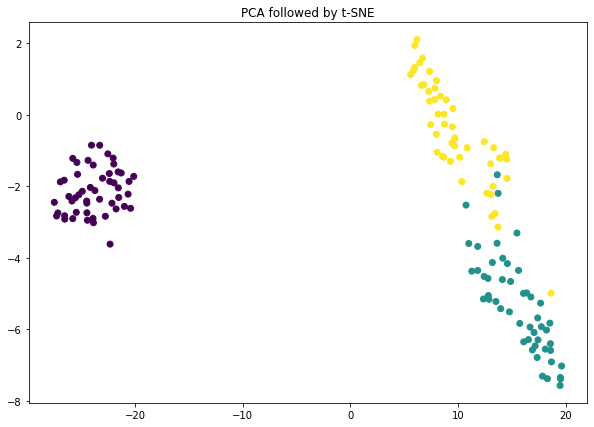

In [8]:
iris_pca_then_tsne = TSNE(learning_rate=200).fit_transform(iris_pca)
plt.figure(figsize=(10,7))
plt.scatter(iris_pca_then_tsne[:,0], iris_pca_then_tsne[:,1],c=y)
plt.title("PCA followed by t-SNE")

###### `Isomap` algorithm attempts to preserve geodesic distnace between all of the points in an algorithms, starting with a nearest neighbour search, followed by a graph searhc, and then a partial eigenvalue decomposition .

##### Testing methods to reduce dimensionality with pipelines 

In [9]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.model_selection import GridSearchCV 
from sklearn.datasets import load_iris 
from sklearn.pipeline import Pipeline 
from sklearn.svm import SVC, LinearSVC 
from sklearn.decomposition import PCA, NMF, TruncatedSVD 
from sklearn.manifold import Isomap 

In [10]:
pipe = Pipeline([('reduce_dim',PCA()),('classify',SVC())])


In [11]:
#NOTE: non-negative matrix factorization (NMF) algorithm utilizes SVDs to break up a matrix into a non-negative factors
#Useful to compare its performance

param_grid = [
    {
    'reduce_dim':[PCA(), NMF(), Isomap(), TruncatedSVD()],
    'reduce_dim__n_components':[2,3],
    'classify':[SVC(),LinearSVC()],
    'classify__C':[1,10,100,1000]
    }
]

In [12]:
grid = GridSearchCV(pipe, cv=3, n_jobs=-1, param_grid=param_grid)
iris = load_iris()
grid.fit(iris.data, iris.target)


c:\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('reduce_dim', PCA()),
                                       ('classify', SVC())]),
             n_jobs=-1,
             param_grid=[{'classify': [SVC(C=100), LinearSVC()],
                          'classify__C': [1, 10, 100, 1000],
                          'reduce_dim': [PCA(), NMF(n_components=3), Isomap(),
                                         TruncatedSVD()],
                          'reduce_dim__n_components': [2, 3]}])

In [13]:
grid.best_params_

{'classify': SVC(C=100),
 'classify__C': 100,
 'reduce_dim': NMF(n_components=3),
 'reduce_dim__n_components': 3}

In [14]:
grid.best_score_

0.98

In [16]:
import pandas as pd 
results_df = pd.DataFrame(grid.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classify,param_classify__C,param_reduce_dim,param_reduce_dim__n_components,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002680,0.000473,0.001128,0.000181,SVC(C=100),1,PCA(),2,"{'classify': SVC(C=100), 'classify__C': 1, 're...",0.96,0.94,0.96,0.953333,0.009428,37
1,0.003634,0.001035,0.001335,0.000472,SVC(C=100),1,PCA(),3,"{'classify': SVC(C=100), 'classify__C': 1, 're...",0.98,0.98,0.94,0.966667,0.018856,13
2,0.014379,0.002354,0.001589,0.000423,SVC(C=100),1,NMF(n_components=3),2,"{'classify': SVC(C=100), 'classify__C': 1, 're...",1.00,0.96,0.96,0.973333,0.018856,3
3,0.016564,0.002212,0.002433,0.000317,SVC(C=100),1,NMF(n_components=3),3,"{'classify': SVC(C=100), 'classify__C': 1, 're...",1.00,0.94,0.92,0.953333,0.033993,37
4,0.024659,0.006861,0.005158,0.001619,SVC(C=100),1,Isomap(),2,"{'classify': SVC(C=100), 'classify__C': 1, 're...",0.98,0.94,0.92,0.946667,0.024944,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.016195,0.001642,0.001337,0.000477,LinearSVC(),1000,NMF(n_components=3),3,"{'classify': LinearSVC(), 'classify__C': 1000,...",0.98,0.94,0.94,0.953333,0.018856,37
60,0.014469,0.001459,0.005682,0.001942,LinearSVC(),1000,Isomap(),2,"{'classify': LinearSVC(), 'classify__C': 1000,...",0.96,0.88,0.80,0.880000,0.065320,63
61,0.016542,0.002125,0.003673,0.000628,LinearSVC(),1000,Isomap(),3,"{'classify': LinearSVC(), 'classify__C': 1000,...",0.94,0.86,0.96,0.920000,0.043205,57
62,0.007182,0.001314,0.000502,0.000408,LinearSVC(),1000,TruncatedSVD(),2,"{'classify': LinearSVC(), 'classify__C': 1000,...",0.86,0.96,0.78,0.866667,0.073636,64
